In [1]:
import numpy as np
import pandas as pd
import math
import datetime
import os
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [3]:
import sklearn
import sklearn.preprocessing

In [4]:
df = pd.read_csv("data/flattened_data.csv", index_col = "datetime")


In [5]:
df.head()

,1INCHBUSD_open,1INCHBUSD_high,1INCHBUSD_low,1INCHBUSD_close,1INCHBUSD_volume,1INCHUSD_open,1INCHUSD_high,1INCHUSD_low,1INCHUSD_close,1INCHUSD_volume,...,ZRXBUSD_open,ZRXBUSD_high,ZRXBUSD_low,ZRXBUSD_close,ZRXBUSD_volume,ZRXUSD_open,ZRXUSD_high,ZRXUSD_low,ZRXUSD_close,ZRXUSD_volume
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.410,2.450,2.406,2.429,27034.1,2.39,2.42,2.39,2.42,47726.30,...,0.8225,0.8375,0.8225,0.8349,2957.0,0.803274,0.815819,0.803274,0.815819,124094.48027
2022-01-01 01:00:00,2.434,2.441,2.421,2.424,15641.5,2.42,2.44,2.41,2.44,109643.15,...,0.8367,0.8367,0.8262,0.8262,7690.0,0.815761,0.818488,0.812232,0.816939,430003.38704
2022-01-01 02:00:00,2.423,2.444,2.418,2.434,10500.5,2.43,2.45,2.43,2.44,22534.85,...,0.8249,0.8305,0.8249,0.8296,1352.0,0.817332,0.841967,0.816370,0.825341,545121.67633
2022-01-01 03:00:00,2.433,2.449,2.433,2.435,11621.9,2.43,2.45,2.43,2.43,16066.99,...,0.8310,0.8327,0.8271,0.8271,5814.0,0.825479,0.826189,0.819242,0.821205,174704.12975
2022-01-01 04:00:00,2.436,2.454,2.415,2.428,18122.9,2.42,2.43,2.40,2.40,35143.16,...,0.8262,0.8326,0.8239,0.8326,4731.0,0.822383,0.824401,0.814999,0.821184,109516.28991


In [6]:
# check if market bearish
df2 = df.copy()
print(df.shape)
ilist = []
for i in range(len(df.columns)):
    if i%5!=3:
        ilist.append(i)
df2 = df2.drop(df.columns[ilist],axis = 1)
print(df2.shape)
price_list = df2.iloc[0]
print(len(price_list))

(3624, 1955)
(3624, 391)
391


In [9]:
# plt.plot(df2["mean"], color='magenta', marker='o',mfc='pink' ) #plot the data
# plt.xticks(range(0,len(df2["mean"])+1, 1)) #set the tick frequency on x-axis

# plt.ylabel('data') #set the label for y axis
# plt.xlabel('index') #set the label for x-axis
# plt.title("Plotting a list") #set the title of the graph
# plt.show() #display the graph

In [141]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten, Conv2D
from tensorflow.keras.models import Sequential, Model


In [8]:
# Normalize the data ¯\_(ツ)_/¯
x = df.values #returns a numpy array
df = pd.DataFrame(x, columns = df.columns)
df.head

<bound method NDFrame.head of       1INCHBUSD_open  1INCHBUSD_high  1INCHBUSD_low  1INCHBUSD_close  \
0              2.410           2.450          2.406            2.429   
1              2.434           2.441          2.421            2.424   
2              2.423           2.444          2.418            2.434   
3              2.433           2.449          2.433            2.435   
4              2.436           2.454          2.415            2.428   
...              ...             ...            ...              ...   
3619           0.967           0.972          0.953            0.964   
3620           0.963           0.965          0.960            0.965   
3621           0.964           0.964          0.958            0.961   
3622           0.960           0.966          0.953            0.965   
3623           0.965           0.981          0.961            0.978   

      1INCHBUSD_volume  1INCHUSD_open  1INCHUSD_high  1INCHUSD_low  \
0              27034.1          2.3

In [21]:
# # Test train split
# valid_set_size_percentage = 15
# test_set_size_percentage = 15


# def split_data(data, seq_len):
#     data_raw = data.values # convert to numpy array
#     data = []
    
#     # create all possible sequences of length seq_len
#     for index in range(len(data_raw) - seq_len): 
#         data.append(data_raw[index: index + seq_len])
    
    
#     data = np.array(data)
#     print(data.shape)
#     valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]))
#     test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]))
#     train_set_size = data.shape[0] - (valid_set_size + test_set_size)
    
#     x_train = data[:train_set_size,:-1,:]
#     y_train = data[:train_set_size,-1,:]
    
#     x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
#     y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
#     x_test = data[train_set_size+valid_set_size:,:-1,:]
#     y_test = data[train_set_size+valid_set_size:,-1,:]
    
#     return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [214]:

## split the dataset into 70:15:15
last_15 = sorted(df.index.values)[-int(0.15*len(df))] # Last 15% indices
last_30 = sorted(df.index.values)[-int(0.3*len(df))] 

train_data = df[(df.index < last_30)].values
val_data = df[(df.index >= last_30) & (df.index < last_15)].values
test_data = df[(df.index >= last_15)].values

print('Training set shape: {}'.format(train_data.shape))
print('Validation set shape: {}'.format(val_data.shape))
print('Test data set: {}'.format(test_data.shape))
# standardize the dataset
scaler = sklearn.preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)
# reshape the data with to window size
seq_len = 336 #30

def reshape_data(seq_len, data):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[:][i])
    X, y = np.array(X), np.array(y)
    return X, y

x_train, y_train = reshape_data(seq_len, train_data)
x_val, y_val = reshape_data(seq_len, val_data)
x_test, y_test = reshape_data(seq_len, test_data)

print('Training set shape', x_train.shape, y_train.shape)
print('Validation set shape', x_val.shape, y_val.shape)
print('Testing set shape' ,x_test.shape, y_test.shape)
print(df.shape)


Training set shape: (2537, 1955)
Validation set shape: (544, 1955)
Test data set: (543, 1955)
Training set shape (2201, 336, 1955) (2201, 1955)
Validation set shape (208, 336, 1955) (208, 1955)
Testing set shape (207, 336, 1955) (207, 1955)
(3624, 1955)


In [215]:
n_steps_in = seq_len# Same as sequence length
n_steps_out = 1
# [samples, timesteps, features]
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_val.shape)
print('y_valid.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)
n_features = x_train.shape[2]



x_train.shape =  (2201, 336, 1955)
y_train.shape =  (2201, 1955)
x_valid.shape =  (208, 336, 1955)
y_valid.shape =  (208, 1955)
x_test.shape =  (207, 336, 1955)
y_test.shape =  (207, 1955)


In [217]:
profit = 0
x_test_last = x_test[:, -1, :]

print(x_test_last.shape)
x_test_last_close = []
y_test_close = []
y_test_pred_close = []
for i in range(x_test_last.shape[1]):
    if i%5 ==3:
        x_test_last_close.append(x_test_last[:,i])
        y_test_close.append(y_test[:,i])
        # y_test_pred_close.append(y_test_pred[:,i])
x_test_last_close = np.transpose(np.array(x_test_last_close))
y_test_close = np.transpose(np.array(y_test_close))
# y_test_pred_close = np.transpose(np.array(y_test_pred_close))
print(x_test_last_close.shape)
print(y_test_close.shape)
# print(y_test_pred_close.shape)

loss_money = 0
profit_money = 0
for i in range(x_test_last_close.shape[0]):
    for j in range(x_test_last_close.shape[1]):
        if x_test_last_close[i,j] != 0:
            profit = profit - 1000 + 1000*(y_test_close[i, j]/x_test_last_close[i,j])
print(profit)


(207, 1955)
(207, 391)
(207, 391)
176747.30788388048


In [218]:
model = Sequential()

# two layer model, known to work well
model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(GRU(100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# trains faster, but also works
# model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# one layer SimpleRNN seems to be enough for this data set
# model.add(SimpleRNN(n_steps_out*n_features, activation='relu', input_shape=(n_steps_in, n_features)))

# CNN
# Incredibly **** results
# model.add(Conv1D(filters=256, kernel_size=2, padding='same', activation='relu',
#                          input_shape=(n_steps_in, n_features)))
# model.add(Dropout(0.2))
# model.add(Conv1D(filters=256, kernel_size=4, padding='same', activation='relu',
#                          input_shape=(n_steps_in, n_features)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

# optional regularization
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# combines final outputs from RNN into continous output
model.add(Dense(n_steps_out*n_features))
# model.add(tf.keras.layers.Reshape((n_steps_out, n_features)))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_49 (GRU)                (None, 336, 100)          617100    
                                                                 
 gru_50 (GRU)                (None, 336, 100)          60600     
                                                                 
 dropout_32 (Dropout)        (None, 336, 100)          0         
                                                                 
 gru_51 (GRU)                (None, 256)               274944    
                                                                 
 dense_22 (Dense)            (None, 1955)              502435    
                                                                 
Total params: 1,455,079
Trainable params: 1,455,079
Non-trainable params: 0
_________________________________________________________________


In [219]:
batch_size = 32
epochs=6 #25

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/6
69/69 [==============================] - 80s 1s/step - loss: 0.0187 - val_loss: 0.0278
Epoch 2/6
69/69 [==============================] - 73s 1s/step - loss: 0.0050 - val_loss: 0.0252
Epoch 3/6
69/69 [==============================] - 75s 1s/step - loss: 0.0033 - val_loss: 0.0249
Epoch 4/6
69/69 [==============================] - 75s 1s/step - loss: 0.0028 - val_loss: 0.0249
Epoch 5/6
69/69 [==============================] - 75s 1s/step - loss: 0.0025 - val_loss: 0.0249
Epoch 6/6
69/69 [==============================] - 79s 1s/step - loss: 0.0023 - val_loss: 0.0263


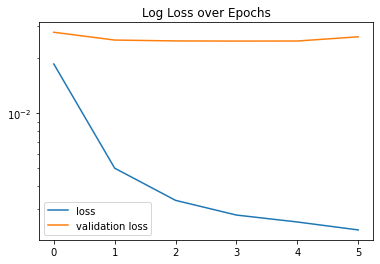

In [220]:
plt.yscale('log')
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Log Loss over Epochs')

plt.legend(['loss', 'validation loss'])

In [221]:
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

0.9994982481002808

In [222]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


In [223]:
print(y_test.shape)
y_test.shape

(207, 1955)


(207, 1955)

In [224]:
test = y_test[:,1]
print(np.array(test.shape))


[207]


In [225]:
from sklearn.metrics import r2_score
r2_array = []
for i in range(y_test.shape[1]):
    r2_array.append(r2_score(np.array(y_test[:, i]), np.array(y_test_pred[:, i])))

In [226]:
import statistics
print(sum(r2_array)/len(r2_array))
print(statistics.median(r2_array))

-6724.780128374904
-891.782532896508


1955


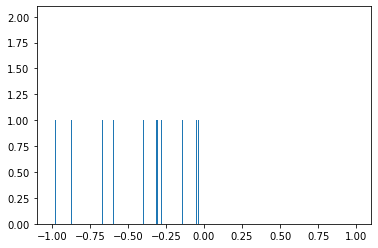

In [227]:
plt.hist(r2_array, bins = 1000, range=[-1, 1])
print(len(r2_array))

In [228]:
r2_no_volume = []
for i in range(len(r2_array)):
    if i%5:
        r2_no_volume.append(r2_array[i])

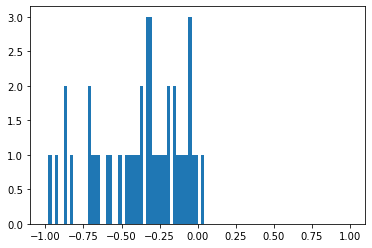

In [229]:
plt.hist(r2_no_volume, bins = 100, range=[-1, 1])
plt.show()

In [230]:
print(x_test.shape)
x_test_last = x_test[:, -1, :]
print(x_test_last.shape)

(207, 336, 1955)
(207, 1955)


In [231]:
# sign change accuracy
y_true_change = []
y_pred_change = []
for i in range(y_test.shape[1]):
    temp_true_change = []
    temp_pred_change = []
    for j in range(y_test.shape[0]):
        temp_true_change.append(y_test[j,i]-x_test_last[j,i])
        temp_pred_change.append(y_test_pred[j,i]-x_test_last[j,i])
    y_true_change.append(temp_true_change)
    y_pred_change.append(temp_pred_change)
y_true_change = np.array(y_true_change)
y_pred_change = np.array(y_pred_change)


In [232]:
y_pred_change.shape
# currency_x_feature, timestep

(1955, 207)

In [233]:
sgn_change = []
for i in range(y_pred_change.shape[1]):
    # append average accuracy of sign equality
    s = 0
    for j in range(y_pred_change.shape[0]):
        if ((y_true_change[j, i]*y_pred_change[j, i]) >= 0):
        #currently ignoring where no change predicted or seen
            s = s+1
    sgn_change.append(s/y_pred_change.shape[0])
print(sum(sgn_change)/len(sgn_change))

0.5261895054177939


In [234]:
y_pred_change_close = []
y_true_change_close = []
for i in range(y_pred_change.shape[0]):
    if (i%5==3):
        y_pred_change_close.append(y_pred_change[i,:])
        y_true_change_close.append(y_true_change[i,:])
y_pred_change_close = np.array(y_pred_change_close)
y_true_change_close = np.array(y_true_change_close)

In [235]:
r2_only_close = []
for i in range(len(r2_array)):
    if i%5==3:
        r2_only_close.append(r2_array[i])

In [236]:
sgn_change_close = []
for i in range(y_pred_change_close.shape[1]):
    # append average accuracy of sign equality
    s = 0
    for j in range(y_pred_change_close.shape[0]):
        if ((y_true_change_close[j, i]*y_pred_change_close[j, i]) >= 0):
        #currently ignoring where no change predicted or seen
            s = s+1
    sgn_change.append(s/y_pred_change_close.shape[0])
print(sum(sgn_change)/len(sgn_change))

0.5243040883650243


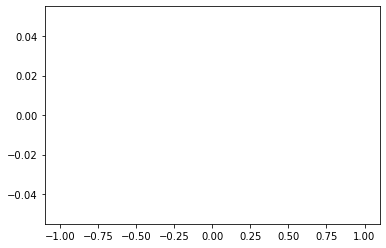

In [237]:
plt.hist(r2_only_close, bins = 10, range=[-1, 1])
plt.show()

In [238]:
# These r2 scores are poop.
perc_r2 = 0
for i in range(len(r2_only_close)):
    if r2_only_close[i]>0:
        perc_r2 = perc_r2 +1 
print(perc_r2/len(r2_only_close))
# <10% of the time we actually get "good" r2 scores.
# Most of the time, we are horrible.

0.0


In [239]:
# TODO, look at the tickers where we have higher r2 score, whats so special about them compared to the ones where we don't
# TODO, scatter for true/pred (?)
# TODO, automate hyperparameter tuning

In [240]:
# TODO, trading decisions - profit
print(x_test_last.shape)
x_test_last_close = []
y_test_close = []
y_test_pred_close = []
for i in range(x_test_last.shape[1]):
    if i%5 ==3:
        x_test_last_close.append(x_test_last[:,i])
        y_test_close.append(y_test[:,i])
        y_test_pred_close.append(y_test_pred[:,i])
x_test_last_close = np.transpose(np.array(x_test_last_close))
y_test_close = np.transpose(np.array(y_test_close))
y_test_pred_close = np.transpose(np.array(y_test_pred_close))
print(x_test_last_close.shape)
print(y_test_close.shape)
print(y_test_pred_close.shape)

(207, 1955)
(207, 391)
(207, 391)
(207, 391)


In [241]:
profit = 0
for i in range(x_test_last_close.shape[0]):
    for j in range(x_test_last_close.shape[1]):
        if x_test_last_close[i,j] != 0:
            profit = profit - 1000 + 1000*(y_test_close[i, j]/x_test_last_close[i,j])
print(profit)

176747.30788388048


In [242]:
profit_model = 0 
for i in range(x_test_last_close.shape[0]):
    for j in range(x_test_last_close.shape[1]):
        if x_test_last_close[i,j] != 0 and y_test_pred_close[i, j] > x_test_last_close[i, j]:
                profit_model = profit_model - 1000 + 1000*(y_test_close[i, j]/x_test_last_close[i,j])
print(profit_model)


162742.7282008189


In [243]:
print(np.count_nonzero(x_test_last))
x_test_last.shape
# TODO see how there are 0 value close on coins.

404223


(207, 1955)

In [179]:
# Account for shorting, hard to make money in a bearish market, you make the difference scaled to
# 1000 if you predict correctly. Lose the same amount if you wrong
# Base profit -
from random import random
profit_array = []
for i in range(100):
    profit = 0
    for i in range(x_test_last_close.shape[0]):
        for j in range(x_test_last_close.shape[1]):
            if x_test_last_close[i,j] != 0:
                if random() > 0.5:
                    profit = profit - 1000 + 1000*(y_test_close[i, j]/x_test_last_close[i,j])
                else:
                    profit = profit + 1000 - 1000*(y_test_close[i, j]/x_test_last_close[i,j])
    profit_array.append(profit)
print(np.mean(profit_array))

# since we're using random, this can vary widely, average over 100 runs


4793.183599894157


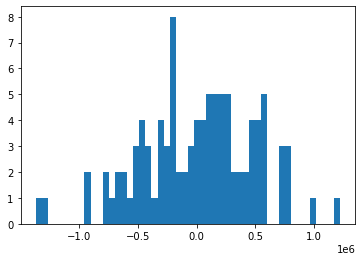

In [244]:
plt.hist(profit_array, bins = 50)
plt.show()

In [245]:
profit_model = 0 
for i in range(x_test_last_close.shape[0]):
    for j in range(x_test_last_close.shape[1]):
        if x_test_last_close[i,j] != 0:
            if y_test_pred_close[i, j] > x_test_last_close[i, j]:
                profit_model = profit_model - 1000 + 1000*(y_test_close[i, j]/x_test_last_close[i,j])
            else:
                profit_model = profit_model + 1000 - 1000*(y_test_close[i, j]/x_test_last_close[i,j])
print(profit_model)

148738.1485177587


In [ ]:
#TODO model confidence, layer the transformer